In [1]:
!pip install accelerate datasets evaluate tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/44.4 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 107.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.4.1
    Uninstalling sentence-transformers-3.4.1:
      Successfully uninstalled sentence-transformers-3.4.1


In [3]:
import re
import string

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import evaluate
import transformers
import torch
import os
from transformers import EarlyStoppingCallback
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import DataCollatorWithPadding
from transformers import (
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    AutoModelForSequenceClassification
)
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from transformers import DataCollatorWithPadding
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [6]:
np.random.seed(0)

In [7]:
data_train = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/Model for benchmark/data/train.csv')

In [8]:
data_train = data_train.drop(columns=['Unnamed: 0'])

In [9]:
data_test = pd.read_csv('/content/drive/MyDrive/Znatno_personal/Отчетность ВКР/Артефакты/Parsing_avito/data_test(sp).csv')

In [10]:
data_test = data_test.drop(columns=['Unnamed: 0'])

In [11]:
X = data_train['message.text']
y = data_train['Оценка']
X_test = data_test['message.text']
y_test = data_test['Оценка']

In [12]:
y = y.apply(lambda x: x if x > 1 else 1)
y = y-1

In [13]:
y_test = y_test.apply(lambda x: x if x > 1 else 1)
y_test = y_test-1

In [14]:
def convert_emojis_to_words(text):

    # Convert emojis to words
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Remove the : from the words and replace _ with space
    text = text.replace("_", " ")

    return text

In [15]:
symbols_pattern = re.compile(pattern = "["
    "@_!#$%^&*()<>?/\|}{~√•—"
                       "]+", flags = re.UNICODE) #спецсимволы
# двойные пробелы
space_pattern = re.compile('\s+')
#exclude = set(string.punctuation) # удаление пунктуации

In [16]:
def clear_text(text):
    """ Функция удаления спецсимволов"""
    # удаление спецсимволов и emoji
    pre = symbols_pattern.sub(r'',text)

    return space_pattern.sub(' ', pre)

In [17]:
def preprocess_text(text):
    """ Финальная функция для обработки """
    # srip + lower + punctuation
    sentence = (
        ''.join([x for x in str(text).strip().lower()])
    )

    return clear_text(sentence)

In [18]:
X = X.apply(preprocess_text)

In [19]:
X_test = X_test.apply(preprocess_text)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state = 42)

In [ ]:
# Load model directly
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", num_labels = 8)

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
tokenizer.add_special_tokens({'pad_token': '[SEP]'})

0

In [24]:
model.resize_token_embeddings(len(tokenizer))

Embedding(119547, 768, padding_idx=0)

In [25]:
model.config.pad_token_id = tokenizer.pad_token_id

In [26]:
class CustomDataset(Dataset):
    def __init__(self, X, y, tokenizer):
        super().__init__()
        self.X = X
        self.y = y
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        text = self.X.iloc[idx]
        #text = self.text.iloc[idx]
        label = self.y.iloc[idx]
        output = self.tokenizer(
            text,
            max_length=512,
            padding='max_length',
            truncation=True
            #return_tensors="pt"
        )

        #one_hot_labels = torch.nn.functional.one_hot(label - 1, num_classes=10)
        output["label"]= torch.tensor(label)
        #output["label"] =
        return output

In [27]:
tokenized_train = CustomDataset(X_train, y_train, tokenizer)
tokenized_test = CustomDataset(X_test, y_test, tokenizer)

In [ ]:
# Replace default_data_collator with DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [29]:
train_dataloader = DataLoader(
    CustomDataset(
        X = X_train,
        y = y_train,
        tokenizer = tokenizer),
    collate_fn=data_collator,
    batch_size=2,
    shuffle=True
)

In [30]:
next(iter(train_dataloader))

{'input_ids': tensor([[  101,  1699, 27031,  ...,   102,   102,   102],
        [  101,   877, 90809,  ...,   102,   102,   102]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([5, 7])}

In [31]:
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")
one_balance_accuracy = evaluate.load("accuracy")

In [33]:
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [34]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    logits = torch.from_numpy(logits)
    labels = torch.from_numpy(labels)
    if torch.isnan(logits).any() or torch.isinf(logits).any():
        print("Warning: NaN or inf values detected in logits.")
    predictions = np.argmax(logits, axis=-1)
    global f1_metric, accuracy_metric
    f1 = f1_metric.compute(predictions=predictions, references=labels,
      average='weighted')['f1']
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)['accuracy']
    one_balance_accuracy
    return {"accuracy": accuracy, "f1":f1}


In [35]:
training_args = TrainingArguments(
    output_dir="//content/drive/MyDrive/finetuning_rubert_LoRA3/",
    per_device_train_batch_size= 16,
    per_device_eval_batch_size=16,
    eval_accumulation_steps=100,
    learning_rate=1e-3,
	  num_train_epochs=15,
    gradient_accumulation_steps=2, # Accumulate gradients over 2 steps
	# PyTorch 2.0 specifics
    bf16=True, # bfloat16 training
    logging_strategy="steps",
    logging_steps=20,
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    optim="adamw_torch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy")
    #report_to="tensorb")

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [36]:
from peft import LoraConfig, get_peft_model

In [37]:
# **PEFT configuration (LoRA)**
peft_config = LoraConfig(
    r=16,  # Rank of the LoRA update matrices
    lora_alpha=16,  # Scaling factor for the LoRA update matrices
    lora_dropout=0.5,  # Dropout probability for the LoRA update matrices
    bias="none",
    modules_to_save=["decode_head"],# Whether to apply bias to the LoRA update matrices
    task_type="SEQ_CLS" ) # Task type for sequence classification

# **Wrap the model with PEFT**
model = get_peft_model(model, peft_config)
model.print_trainable_parameters()

trainable params: 595,976 || all params: 178,455,568 || trainable%: 0.3340


In [39]:
trainer = Trainer(
    model,
    args=training_args,
    train_dataset=CustomDataset(X_train, y_train, tokenizer=tokenizer),  # Use the Dataset object
    eval_dataset=CustomDataset(X_val, y_val, tokenizer=tokenizer),  # Use the Dataset object
    compute_metrics=compute_metrics,
    data_collator=data_collator,
    callbacks=[EarlyStoppingCallback(3, 0.0)]
)

In [41]:
torch.cuda.empty_cache()

In [42]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: busuevatatana472 (busuevatatana472-mfti) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy,F1
20,1.965500,1.833379,0.324047,0.208924
40,1.728000,1.690999,0.304985,0.232568
60,1.555300,1.509870,0.398827,0.348463
80,1.535200,1.453350,0.348974,0.261632
100,1.496400,1.349057,0.483871,0.448455
120,1.343700,1.222438,0.576246,0.556050
140,1.212600,1.245342,0.520528,0.500119
160,1.218100,1.120679,0.612903,0.584591
180,1.108100,1.003477,0.646628,0.642810
200,0.967300,0.960072,0.670088,0.662303


TrainOutput(global_step=1275, training_loss=0.5181123938279993, metrics={'train_runtime': 491.7416, 'train_samples_per_second': 83.184, 'train_steps_per_second': 2.593, 'total_flos': 1.077682310332416e+16, 'train_loss': 0.5181123938279993, 'epoch': 14.912280701754385})

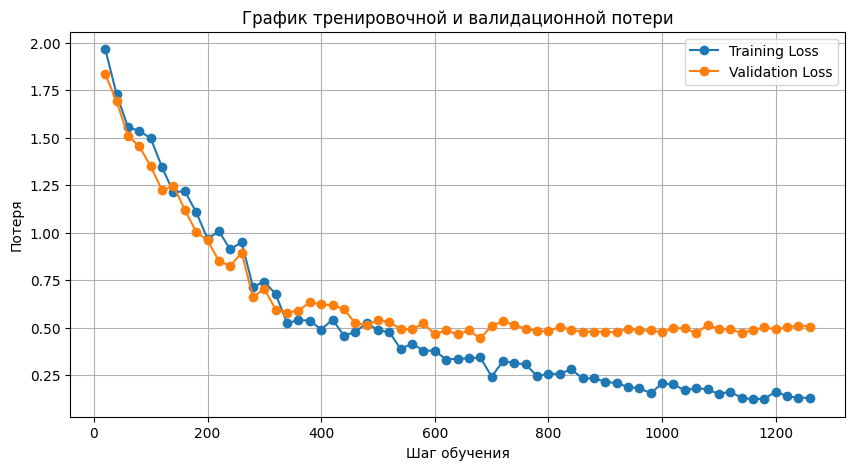

<Figure size 640x480 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt

# Извлекаем историю логирования
log_history = trainer.state.log_history

# Списки для тренировочной и валидационной потерь и соответствующих шагов
train_steps, train_losses = [], []
eval_steps, eval_losses = [], []

for entry in log_history:
    # Тренировочная потеря
    if "loss" in entry:
        # Используем шаг обучения, если он есть, иначе порядковый номер
        train_steps.append(entry.get("step", len(train_steps) + 1))
        train_losses.append(entry["loss"])
    # Валидационная потеря
    if "eval_loss" in entry:
        eval_steps.append(entry.get("step", len(eval_steps) + 1))
        eval_losses.append(entry["eval_loss"])

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, marker="o", label="Training Loss")
plt.plot(eval_steps, eval_losses, marker="o", label="Validation Loss")
plt.xlabel("Шаг обучения")
plt.ylabel("Потеря")
plt.title("График тренировочной и валидационной потери")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('deeppavlov_train_val.png')

In [43]:
model_id = "//content/drive/MyDrive/finetuning_rubert_LoRA3/deepPavlov_with_lora"
model.save_pretrained(model_id)

In [44]:
test_dataset=CustomDataset(X_test, y_test, tokenizer=tokenizer)

In [45]:
test = trainer.predict(test_dataset)

In [67]:
y_pred = np.argmax(test[0],axis=1)

In [46]:
print(test[2])

{'test_loss': 0.7428144812583923, 'test_accuracy': 0.8477272727272728, 'test_f1': 0.8472491982800353, 'test_runtime': 1.7486, 'test_samples_per_second': 251.636, 'test_steps_per_second': 16.013}


In [61]:
y_test

,Оценка
0,0
1,0
2,0
3,3
4,0
...,...
435,1
436,0
437,5
438,1


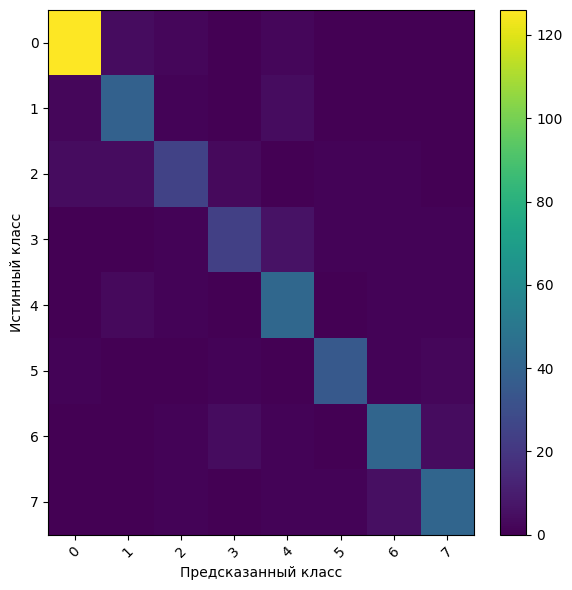

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
unique_labels = np.unique(y_test).astype(int)
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.set_xticklabels(unique_labels, rotation=45)
ax.set_yticklabels(unique_labels)
ax.set_ylabel('Истинный класс')
ax.set_xlabel('Предсказанный класс')
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()


In [56]:
classes = np.unique(y_test)
classes

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# Сначала получим список всех классов
classes = np.unique(y_test)

# 1) F1-score по классам
f1_per_class = f1_score(y_test, y_pred, labels=classes, average=None, zero_division=0)

# 2) «Точность по классу» как доля правильно предсказанных среди всех примеров этого класса
#    (этот показатель в мультиклассе эквивалентен recall для данного класса)
accuracy_per_class = np.array([
    np.mean(y_pred[y_test == cls] == cls)
    for cls in classes
])

# 3) Собираем всё в DataFrame
df = pd.DataFrame({
    'class': classes.astype(str),
    'accuracy': accuracy_per_class,
    'f1_score': f1_per_class
}).set_index('class')

print(df)


       accuracy  f1_score
class                    
0      0.940299  0.943820
1      0.847826  0.812500
2      0.657895  0.714286
3      0.705882  0.727273
4      0.875000  0.807692
5      0.875000  0.897436
6      0.803922  0.811881
7      0.836735  0.836735
